# NLP Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [73]:
Data = pd.read_csv("/kaggle/input/students-writing-evaluation-dataset/SWEData.csv")

In [74]:
Data.shape

(144293, 8)

In [75]:
Data.columns

Index(['id', 'discourse_id', 'discourse_start', 'discourse_end',
       'discourse_text', 'discourse_type', 'discourse_type_num',
       'predictionstring'],
      dtype='object')

In [76]:
Data.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


In [77]:
Data.tail()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
144288,4C471936CD75,1.618153e+12,2234.0,3203.0,if I'm not sure what college I want to attend...,Evidence,Evidence 2,386 387 388 389 390 391 392 393 394 395 396 39...
144289,4C471936CD75,1.618153e+12,3221.0,4509.0,seeking multiple opinions before making a har...,Evidence,Evidence 3,576 577 578 579 580 581 582 583 584 585 586 58...
144290,4C471936CD75,1.618025e+12,4510.0,4570.0,it is better to seek multiple opinions instead...,Position,Position 1,828 829 830 831 832 833 834 835 836 837 838
144291,4C471936CD75,1.618025e+12,4570.0,4922.0,The impact of asking people to help you make a...,Evidence,Evidence 4,839 840 841 842 843 844 845 846 847 848 849 85...
144292,4C471936CD75,1.618025e+12,4935.0,5825.0,there are many other reasons one might want to...,Concluding Statement,Concluding Statement 1,905 906 907 908 909 910 911 912 913 914 915 91...


In [78]:
Data['discourse_type'].unique()

array(['Lead', 'Position', 'Evidence', 'Claim', 'Concluding Statement',
       'Counterclaim', 'Rebuttal'], dtype=object)

In [79]:
Labels = ['discourse_text', 'discourse_type']

In [80]:
Data = Data[Labels]

In [81]:
Data.head()

,discourse_text,discourse_type
0,Modern humans today are always on their phone....,Lead
1,They are some really bad consequences when stu...,Position
2,Some certain areas in the United States ban ph...,Evidence
3,"When people have phones, they know about certa...",Evidence
4,Driving is one of the way how to get around. P...,Claim


In [82]:
Data.rename(columns={'discourse_type': 'label', 'discourse_text': 'text'}, inplace=True)

In [83]:
Data.head()

,text,label
0,Modern humans today are always on their phone....,Lead
1,They are some really bad consequences when stu...,Position
2,Some certain areas in the United States ban ph...,Evidence
3,"When people have phones, they know about certa...",Evidence
4,Driving is one of the way how to get around. P...,Claim


In [85]:
labelencode = {v: k for k, v in enumerate(Data.label.unique())}

In [86]:
labelencode

{'Lead': 0,
 'Position': 1,
 'Evidence': 2,
 'Claim': 3,
 'Concluding Statement': 4,
 'Counterclaim': 5,
 'Rebuttal': 6}

In [87]:
Data['label'] = Data['label'].apply(lambda x: labelencode[x])
Data.label

0         0
1         1
2         2
3         2
4         3
         ..
144288    2
144289    2
144290    1
144291    2
144292    4
Name: label, Length: 144293, dtype: int64

In [88]:
Data.head()

,text,label
0,Modern humans today are always on their phone....,0
1,They are some really bad consequences when stu...,1
2,Some certain areas in the United States ban ph...,2
3,"When people have phones, they know about certa...",2
4,Driving is one of the way how to get around. P...,3


In [58]:
Data.groupby('label').describe()

text                                                               
       count unique                                                top freq
label                                                                      
0       9305   9279  Some schools offer distance learning as an opt...    8
1      15419  15149         Summer projects should be student-designed   20
2      45702  45692  Business issues can be stressful and dangerous...    3
3      50208  50080                                           outdated    6
4      13505  13504  Concluding, if people don't give up cell-phone...    2
5       5817   5801  Opponents whose work depends on a cell phone l...    5
6       4337   4327                                but they are wrong.    3

In [89]:
frac_to_remove = 0.3
Data = Data.drop(Data.sample(frac=frac_to_remove).index)

In [90]:
xtrain, Xtest, ytrain, Ytest = train_test_split(Data['text'], Data['label'], test_size = 0.15, shuffle = True)

In [91]:
Xtrain, Xval, Ytrain, Yval = train_test_split(xtrain, ytrain, test_size = 0.2, shuffle = True)

In [92]:
Xtrain.shape, Ytrain.shape, Xval.shape, Yval.shape, Xtest.shape, Ytest.shape 

((68683,), (68683,), (17171,), (17171,), (15151,), (15151,))

# BERT Modeling

In [93]:
BERT_Preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
BERT_Encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [95]:
input_t = tf.keras.layers.Input(shape = (), dtype = tf.string, name = "text")

Preprocessed_text = BERT_Preprocess(input_t)
Embedding = BERT_Encoder(Preprocessed_text)

Layer = tf.keras.layers.Dropout(0.2, name = "dropout")(Embedding["pooled_output"])
Layer = tf.keras.layers.Dense(7, activation = "softmax", name = "output")(Layer)

In [96]:
Model = tf.keras.Model(inputs = [input_t], outputs = [Layer])
Model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_6 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [97]:
Model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = Model.fit(Xtrain, Ytrain, epochs=4, validation_data=(Xval, Yval))

Epoch 1/4
 926/2147 [===========>..................] - ETA: 4:24 - loss: 1.1380 - accuracy: 0.5983

In [102]:
Predictions = Model.predict(Xtest)

474/474 [==============================] - 102s 213ms/step


In [106]:
# testing model
loss,acc = Model.evaluate(Xtest,Ytest)
hist_dict = history.history
hist_dict.keys()

474/474 [==============================] - 102s 216ms/step - loss: 1.0938 - accuracy: 0.6085


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Different Plots

<function matplotlib.pyplot.show(close=None, block=None)>

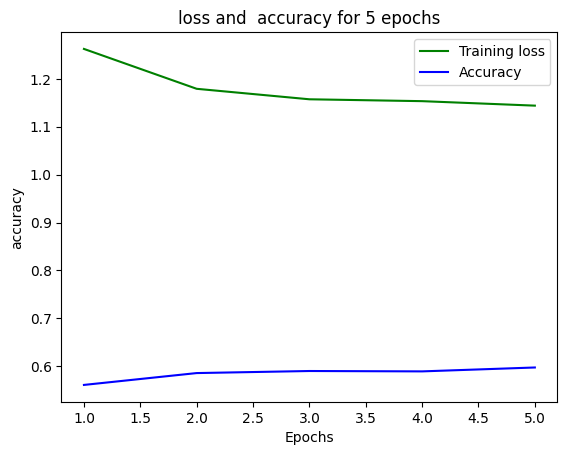

In [111]:
#Ploting loss and testing accuracy
epochs=np.arange(len(hist_dict['accuracy']))
plt.title('loss and  accuracy for 5 epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(epochs+1,hist_dict['loss'],'g',label='Training loss')
plt.plot(epochs+1,hist_dict['accuracy'],'b',label='Accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

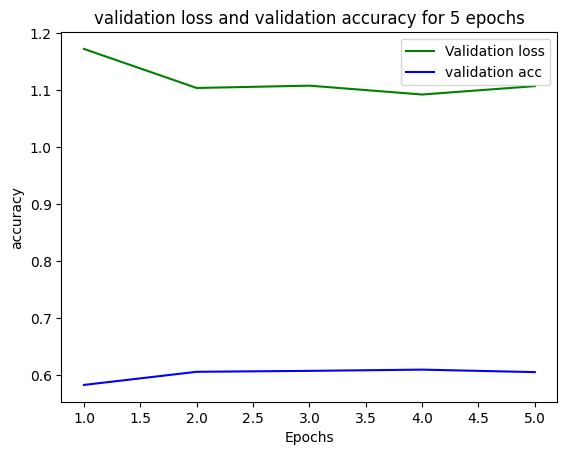

In [112]:
#Ploting validation loss and validation accuracy
epochs=np.arange(len(hist_dict['accuracy']))
plt.title('validation loss and validation accuracy for 5 epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(epochs+1,hist_dict['val_loss'],'g',label='Validation loss')
plt.plot(epochs+1,hist_dict['val_accuracy'],'b',label='validation acc')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

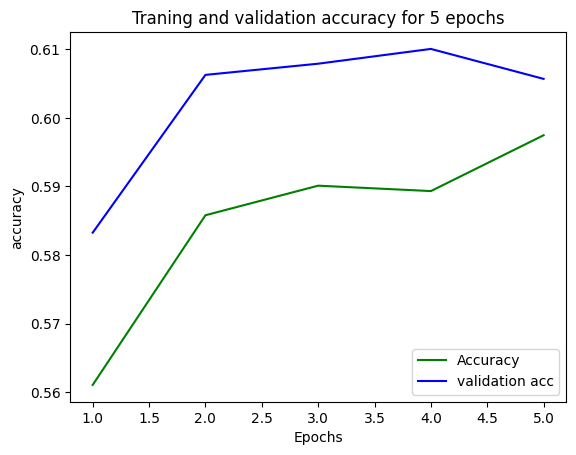

In [113]:
#Ploting validation and testing accuracy
epochs=np.arange(len(hist_dict['accuracy']))
plt.title('Traning and validation accuracy for 5 epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(epochs+1,hist_dict['accuracy'],'g',label='Accuracy')
plt.plot(epochs+1,hist_dict['val_accuracy'],'b',label='validation acc')
plt.legend()
plt.show